In [26]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import f1_score
import numpy as np

In [51]:
path = './playground-series-s4e1/'
train_df = pd.read_csv(path+'train.csv',index_col=0)
test_df = pd.read_csv(path+'test.csv',index_col=0)

In [28]:
#inspect the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


In [29]:
#further check null value
null_col = pd.DataFrame()
for col in train_df.columns:
    null_col.loc[col, 'null_num'] = train_df[col].isnull().sum()
print(null_col)

                 null_num
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0


In [30]:
#check outlier
train_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [31]:
#inspect dataset
train_df.head(20)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0


In [32]:
#check duplication
print(train_df.duplicated().sum())

0


In [33]:
#check uniqueness
train_df['Surname'].nunique()

2797

In [34]:
#check uniqueness
train_df['CustomerId'].nunique()

23221

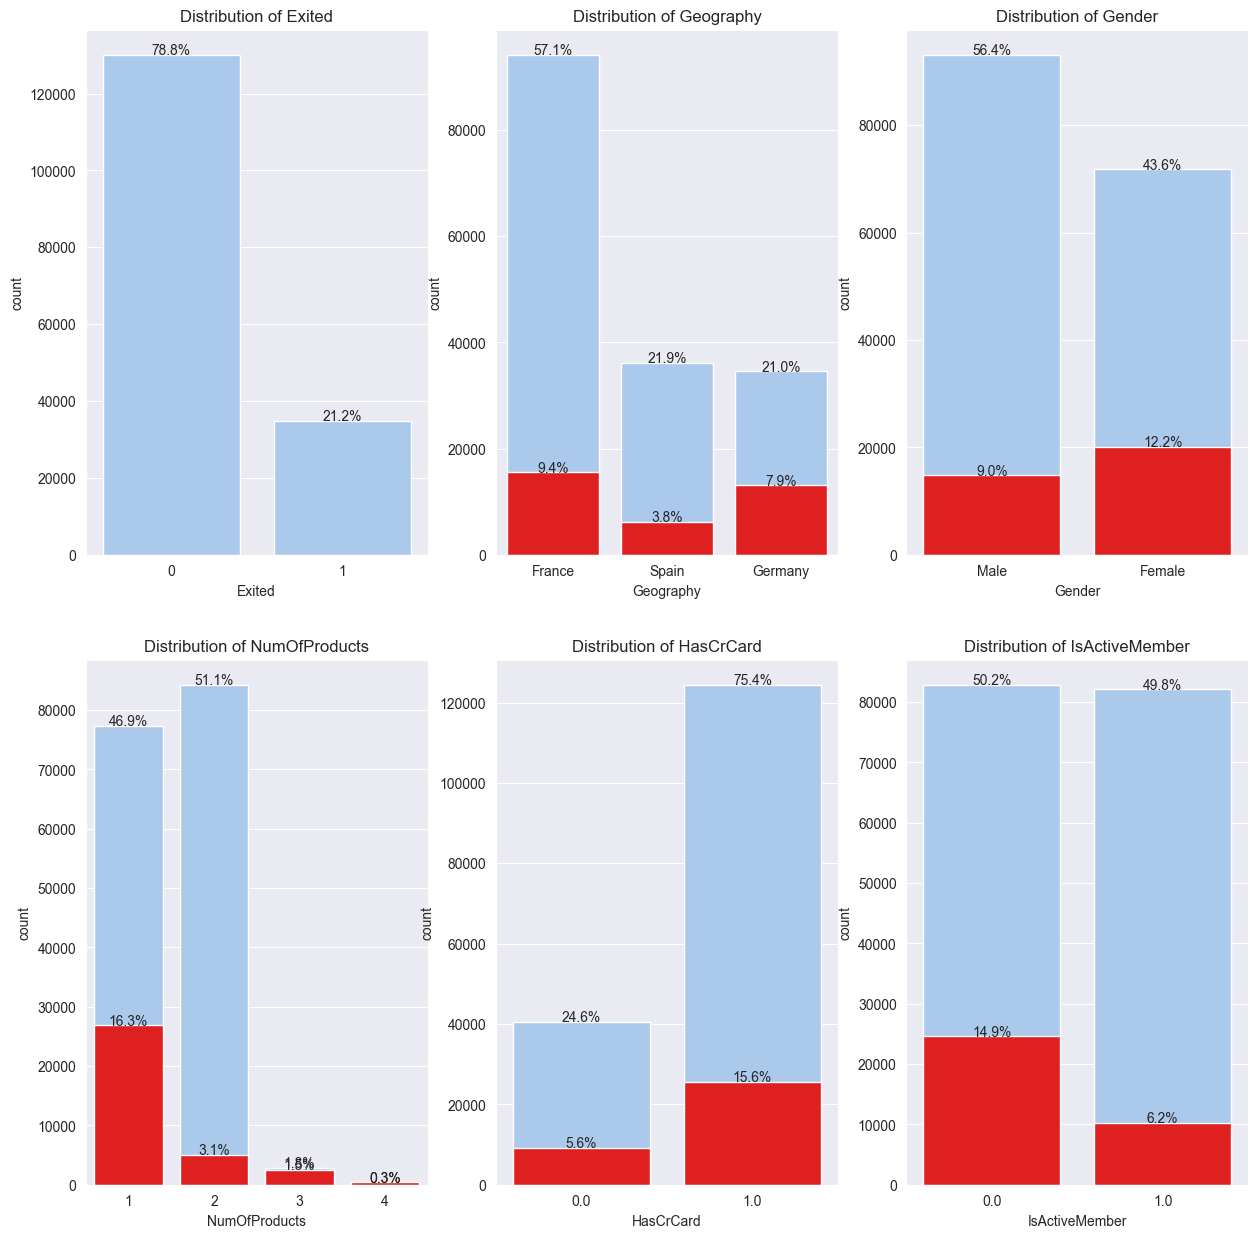

In [35]:
#plot distribution information
fig, ax= plt.subplots(2,3,figsize=(15,15))
cat_list = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited']
exit_table = train_df[train_df['Exited']==1]
def print_pct(ax):
    for patches in ax.patches:
            count = patches.get_height()
            pct = count/train_df.shape[0]*100
            pct = '{:.1f}%'.format(pct)
            ax.annotate(pct,xy = (patches.get_x()+patches.get_width()/2., patches.get_height()),ha = 'center',va = 'baseline')
plt.subplot(2,3,1)
ax = sns.countplot(data=train_df,x='Exited')
print_pct(ax)
plt.title('Distribution of Exited')
for i in range(len(cat_list)-1):
    plt.subplot(2,3,i+2)
    sns.set_palette('bwr')
    ax = sns.countplot(data = train_df, x=cat_list[i])
    ax = sns.countplot(data = exit_table, x=cat_list[i], color='red')
    print_pct(ax)
    plt.title(f'Distribution of {cat_list[i]}')



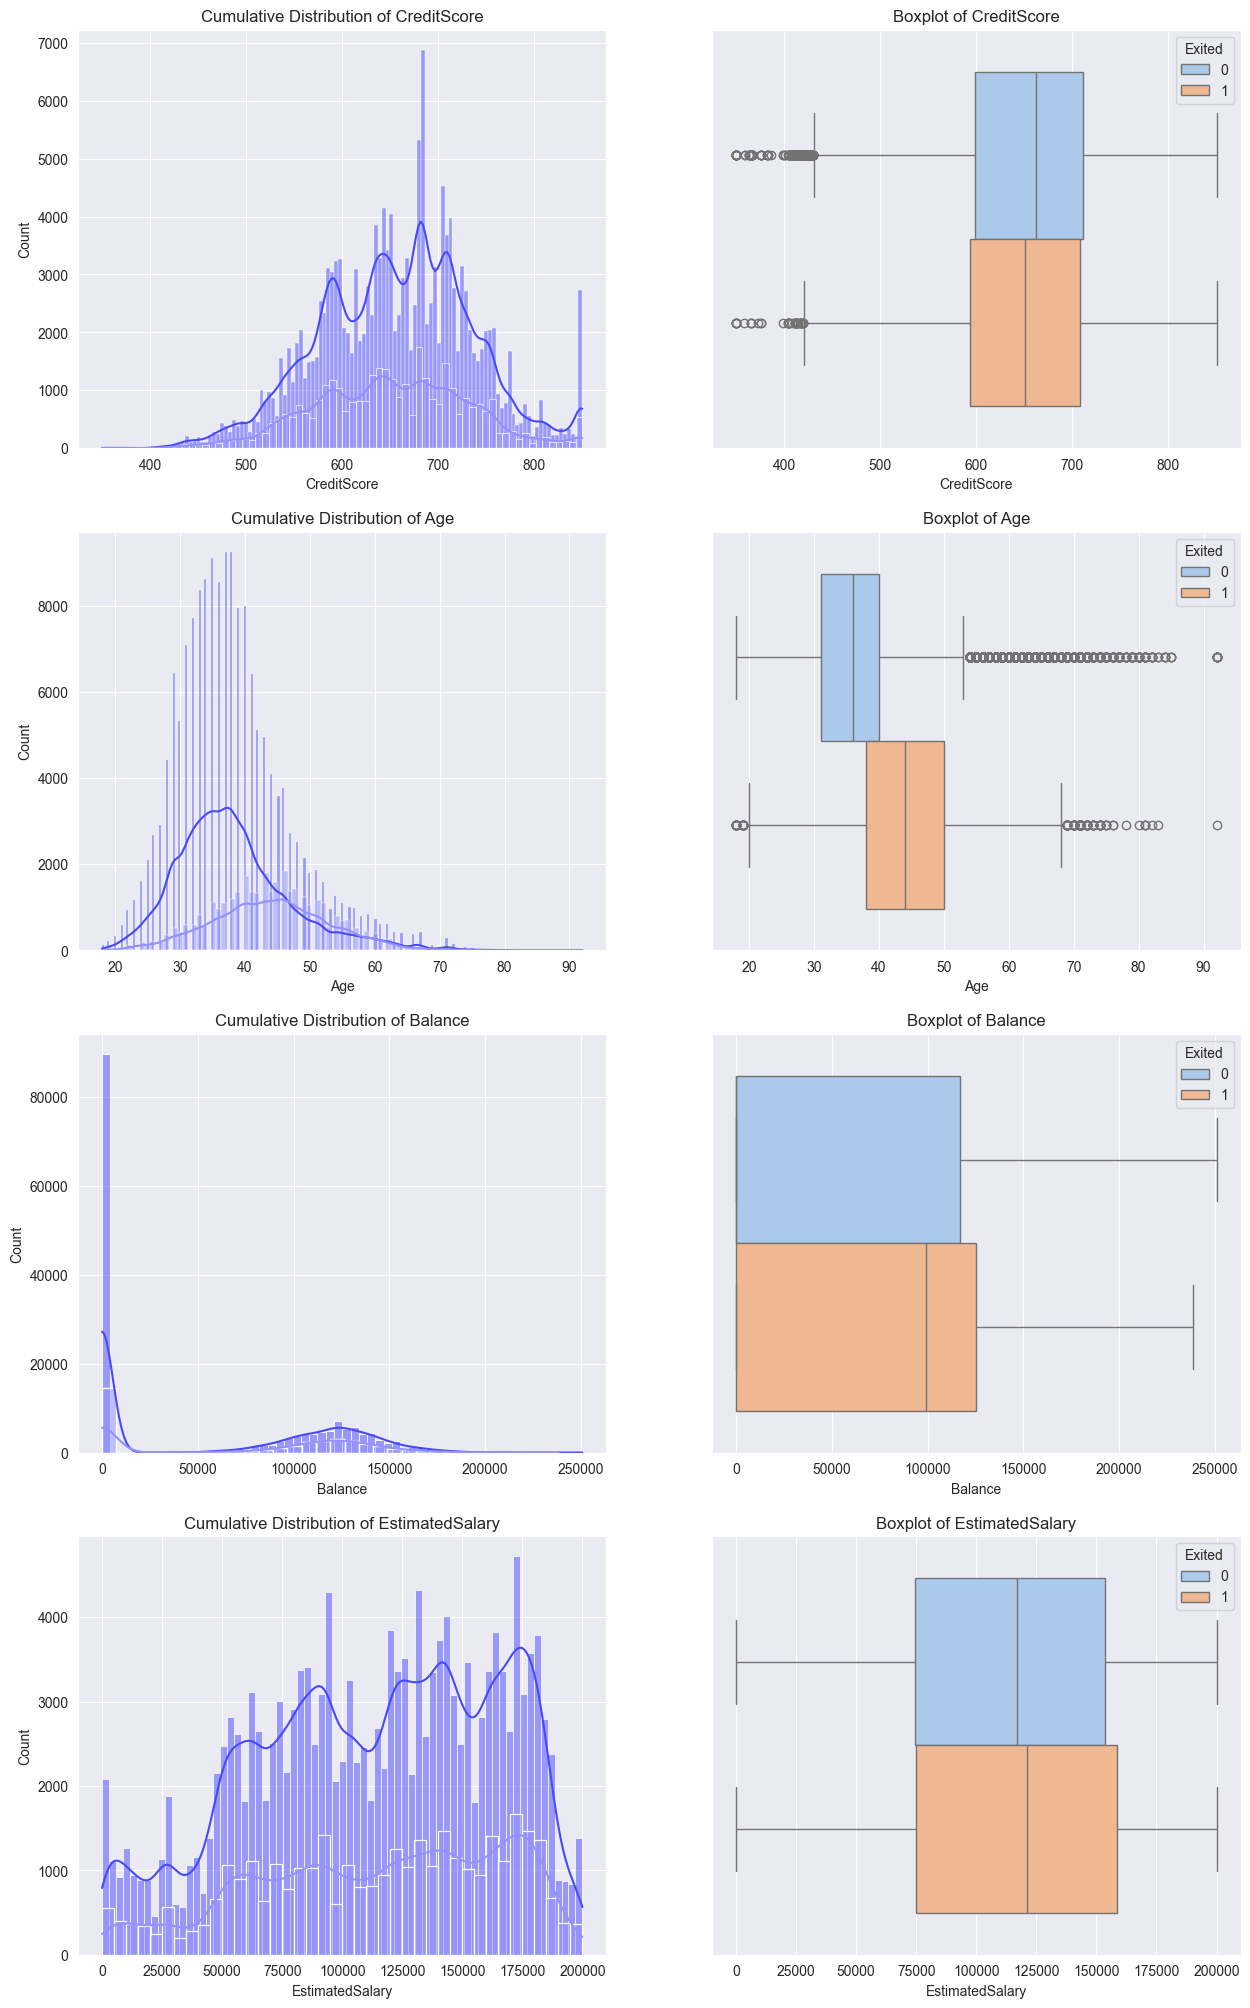

In [36]:
cumu_col = ['CreditScore','Age','Balance','EstimatedSalary']
fig, ax = plt.subplots(4,2,figsize=(15,25))
for i in range(len(cumu_col)):
    plt.subplot(4,2,2*i+1)
    sns.set_palette('pastel')
    sns.histplot(data=train_df,x=cumu_col[i],kde=True)
    sns.histplot(data=exit_table,x=cumu_col[i],kde=True)
    plt.title(f'Cumulative Distribution of {cumu_col[i]}')
    plt.subplot(4,2,2*i+2)
    sns.boxplot(data=train_df,x=cumu_col[i],hue='Exited')
    plt.title(f'Boxplot of {cumu_col[i]}')


Text(0, 0.5, 'Count')

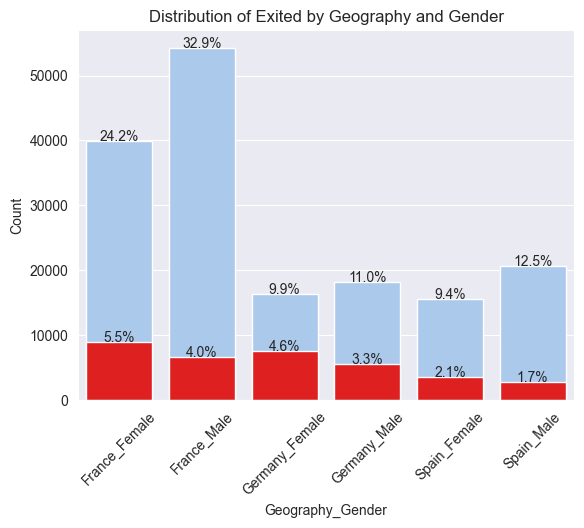

In [37]:
geogender = pd.concat([train_df.groupby(['Geography','Gender'])['Exited'].count(),
exit_table.groupby(['Geography','Gender'])['Exited'].count()], axis=1)
geogender = geogender.rename(index={1:'Active',0:'Inactive'}).reset_index()
geogender['index'] = geogender['Geography'] + '_' + geogender['Gender']
geogender.set_index('index',inplace=True)
geogender.columns = ['Geography', 'Gender', 'TotalNum', 'ExitedNum']
ax = sns.barplot(data=geogender, x='index', y='TotalNum')
ax = sns.barplot(data=geogender, x='index', y='ExitedNum', color='red')
print_pct(ax)
plt.xticks(rotation=45)
plt.title('Distribution of Exited by Geography and Gender')
plt.xlabel('Geography_Gender')
plt.ylabel('Count')

In [38]:
corr_train = train_df.copy()

<Axes: >

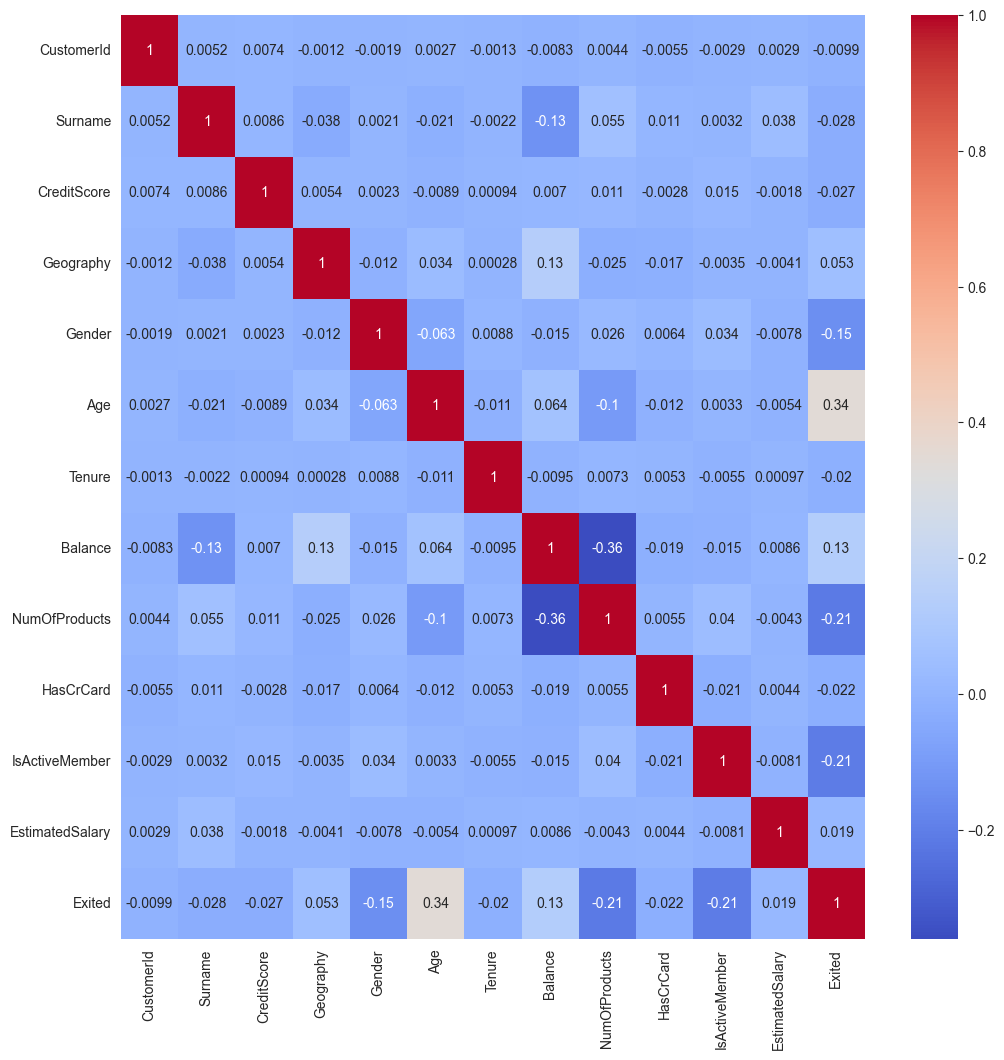

In [39]:
corr_df = [x for x in train_df.columns if train_df[x].dtype == 'object']
for i in corr_df:
    corr_train[i] = LabelEncoder().fit_transform(corr_train[i])
plt.figure(figsize=(12,12))
sns.heatmap(corr_train.corr(),annot=True, cmap='coolwarm')

In [40]:
#split X and Y
X=train_df.drop(columns = ['Exited'])
Y=train_df['Exited']

In [41]:
#apply standard scaler to numerical columns
scaler = StandardScaler()
X[cumu_col] = scaler.fit_transform(X[cumu_col])
#generate dummy variables
X = pd.get_dummies(X,columns=['Geography','Gender'],drop_first=True)

In [42]:
X1 = X.copy()
X=X.drop(columns = ['CustomerId','Surname'])
#generate joint column of id and surname
X1['idname'] = train_df['Surname']+train_df['CustomerId'].astype(str)
X1.drop(columns = ['CustomerId','Surname'])
#initialise TF-IDF
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))  
#apply to idname
Xname = vectorizer.fit_transform(X1['idname'])
#use SVD to extract 3 character
svd = TruncatedSVD(3)
x_sv_train = svd.fit_transform(Xname)
X_sv_train = pd.DataFrame(x_sv_train, columns=['Surname_svd_1', 'Surname_svd_2', 'Surname_svd_3'])
X1 = pd.concat([X, X_sv_train], axis=1)

In [43]:
#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y, test_size=0.2)

Logistic Regression with initial data
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     26065
           1       0.69      0.38      0.49      6942

    accuracy                           0.83     33007
   macro avg       0.77      0.67      0.70     33007
weighted avg       0.82      0.83      0.81     33007



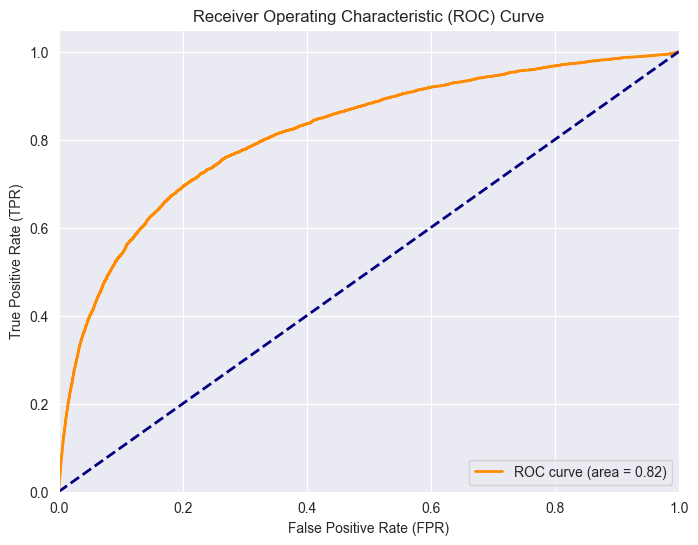

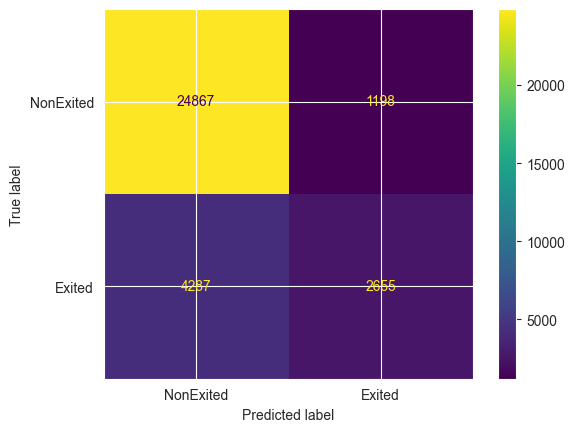

logit(Exited) = -0.06*(CreditScore)+0.83*(Age)-0.01*(Tenure)-0.13*(Balance)-0.92*(NumOfProducts)-0.18*(HasCrCard)-1.28*(IsActiveMember)+0.04*(EstimatedSalary)+1.17*(Geography_Germany)+0.03*(Geography_Spain)-0.67*(Gender_Male)+0.66

Logistic Regression with transformed data
              precision    recall  f1-score   support

           0       0.79      0.88      0.83     26065
           1       0.21      0.11      0.15      6942

    accuracy                           0.72     33007
   macro avg       0.50      0.50      0.49     33007
weighted avg       0.67      0.72      0.69     33007



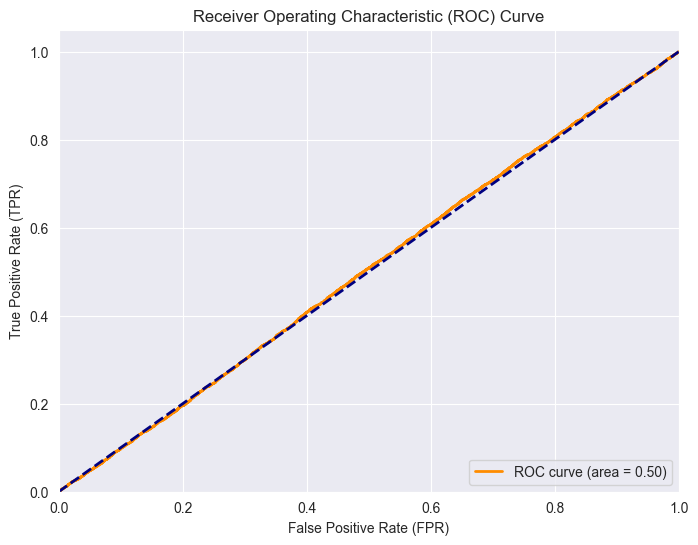

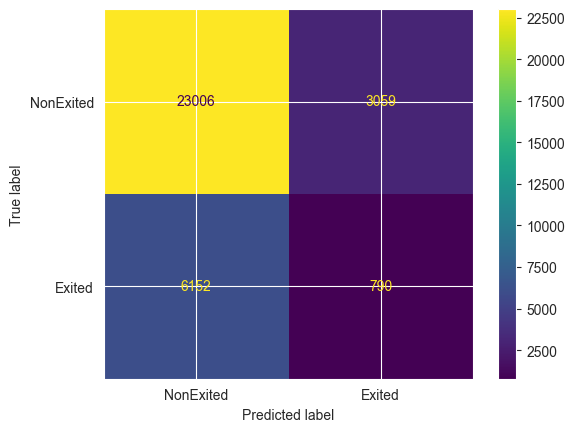

logit(Exited) = -0.06*(CreditScore)+0.84*(Age)-0.02*(Tenure)-0.12*(Balance)-0.91*(NumOfProducts)-0.17*(HasCrCard)-1.27*(IsActiveMember)+0.05*(EstimatedSalary)+1.14*(Geography_Germany)+0.02*(Geography_Spain)-0.66*(Gender_Male)-0.02*(Surname_svd_1)-0.00*(Surname_svd_2)-0.18*(Surname_svd_3)+0.64



In [44]:
#Logistic regression with initial data
#initialise the model
def Logic_Regression(X_train, y_train, X_test, description):
    model = LogisticRegression(max_iter = 10000)
    #train the model
    model.fit(X_train, y_train)
    
    #make prediction
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob > 0.5).astype(int)
    #Evaluation
    print(description)
    print(classification_report(y_test, y_pred))
    #get roc
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    #draw ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    #draw Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['NonExited','Exited'])
    plt.show()
    # get coefficients and intercept
    coefficients = model.coef_[0] 
    intercept = model.intercept_[0]
    print(f'logit(Exited) = ',end='')
    #print coefficients based on + and -
    for i in range(len(coefficients)):
        if i == 0 and coefficients[i] >= 0:
            print(f'{coefficients[i]:.2f}*({X_train.columns[i]})',end='')
        elif coefficients[i] >= 0:
            print(f'+{coefficients[i]:.2f}*({X_train.columns[i]})',end='')
        else:
            print(f'{coefficients[i]:.2f}*({X_train.columns[i]})',end='')
    if intercept < 0:
        print(f'{intercept:.2f}\n')
    else:
        print(f'+{intercept:.2f}\n')
Logic_Regression(X_train, y_train, X_test, 'Logistic Regression with initial data')
Logic_Regression(X_train1, y_train1, X_test1, 'Logistic Regression with transformed data')

In [45]:
# #decision tree
# def decision_tree_model(X_train, y_train, X_test, description):
#     #initialise the model
#     model = DecisionTreeClassifier(random_state=42)
#     model.fit(X_train, y_train)
#     #make prediction
#     y_prob = model.predict_proba(X_test)[:, 1]
#     y_pred = (y_prob > 0.5).astype(int)
#     print(description)
#     print(classification_report(y_test, y_pred))
# 
#     fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# 
#     roc_auc = auc(fpr, tpr)
# 
#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate (FPR)')
#     plt.ylabel('True Positive Rate (TPR)')
#     plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
#     plt.legend(loc="lower right")
#     plt.show()
#     ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['NonExited','Exited'])
#     plt.show()
# decision_tree_model(X_train, y_train,X_test,'decision tree model with initial data')
# decision_tree_model(X_train1, y_train1,X_test1,'decision tree model with transformed data')

In [46]:
# def polynomial_logistic_regression(X_train, y_train, X_test, description):
#     #initialize the features
#     poly = PolynomialFeatures(degree=2, include_bias=False)
# 
#     #construct the model
#     model = LogisticRegression(max_iter=10000)
# 
#     #set up the pipeline
#     pipeline = Pipeline([
#         ('poly', poly),
#         ('logreg', model)
#     ])
# 
#     pipeline.fit(X_train, y_train)
# 
#     y_prob = pipeline.predict_proba(X_test)[:, 1]
#     y_pred = (y_prob > 0.5).astype(int)
#     print(description)
#     print(classification_report(y_test, y_pred))
#     fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# 
#     roc_auc = auc(fpr, tpr)
# 
#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate (FPR)')
#     plt.ylabel('True Positive Rate (TPR)')
#     plt.title('Receiver Operating Characteristic (ROC) Curve for Polynomial Logistic Regression')
#     plt.legend(loc="lower right")
#     plt.show()
#     ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['NonExited','Exited'])
#     plt.show()
# polynomial_logistic_regression(X_train, y_train,X_test,'polynomial logistic regression with initial data')
# polynomial_logistic_regression(X_train1, y_train1,X_test1,'polynomial logistic regression with transformed data')

KNN with initial data
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     26065
           1       0.66      0.54      0.59      6942

    accuracy                           0.85     33007
   macro avg       0.77      0.73      0.75     33007
weighted avg       0.84      0.85      0.84     33007



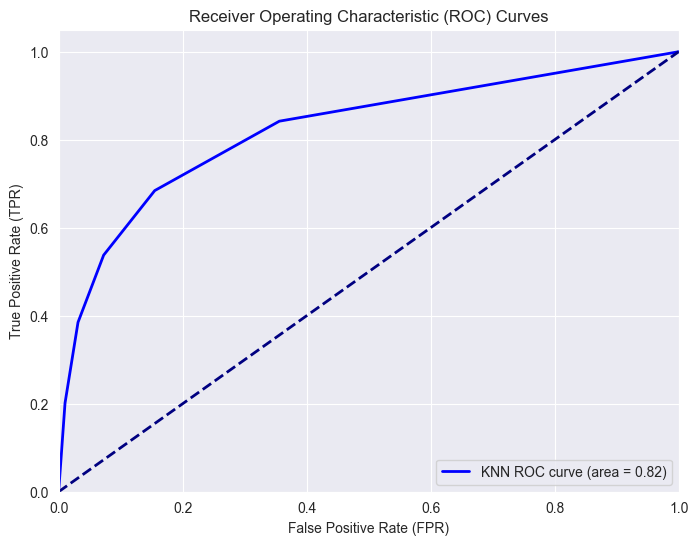

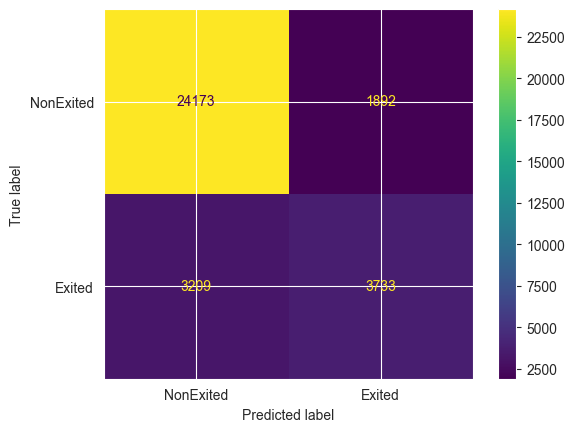

KNN with transformed data
              precision    recall  f1-score   support

           0       0.79      0.84      0.81     26065
           1       0.21      0.16      0.18      6942

    accuracy                           0.70     33007
   macro avg       0.50      0.50      0.50     33007
weighted avg       0.67      0.70      0.68     33007



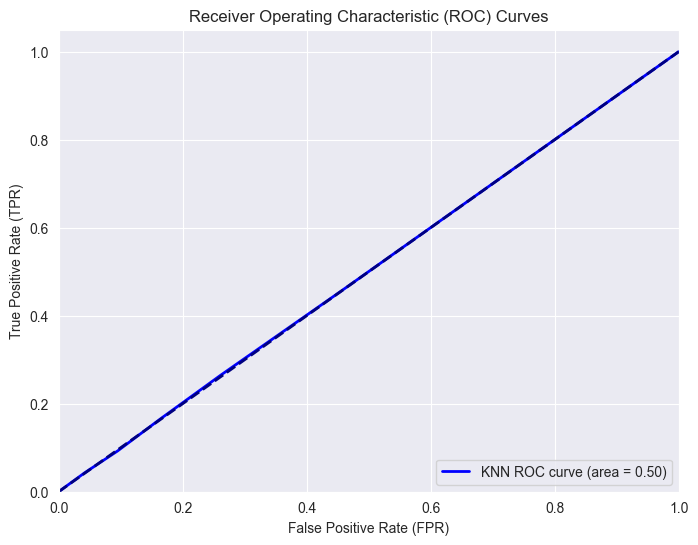

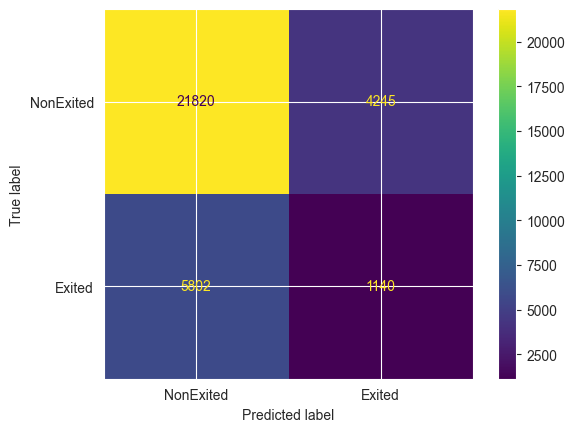

In [47]:
def knn_model(X_train, y_train, X_test, description):
    #initialize the scaler
    scaler = StandardScaler()

    #apply the scaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #construct the model
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_scaled, y_train)

    #make prediction
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_prob > 0.5).astype(int)

    #Evaluation
    print(description)
    print(classification_report(y_test, y_pred))
    fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob)

    roc_auc_knn = auc(fpr_knn, tpr_knn)

    plt.figure(figsize=(8, 6))

    plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')


    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['NonExited','Exited'])
    plt.show()
knn_model(X_train, y_train,X_test,'KNN with initial data')
knn_model(X_train1, y_train1,X_test1,'KNN with transformed data')

Random Forest with initial data
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26065
           1       0.72      0.50      0.59      6942

    accuracy                           0.85     33007
   macro avg       0.80      0.73      0.75     33007
weighted avg       0.84      0.85      0.84     33007



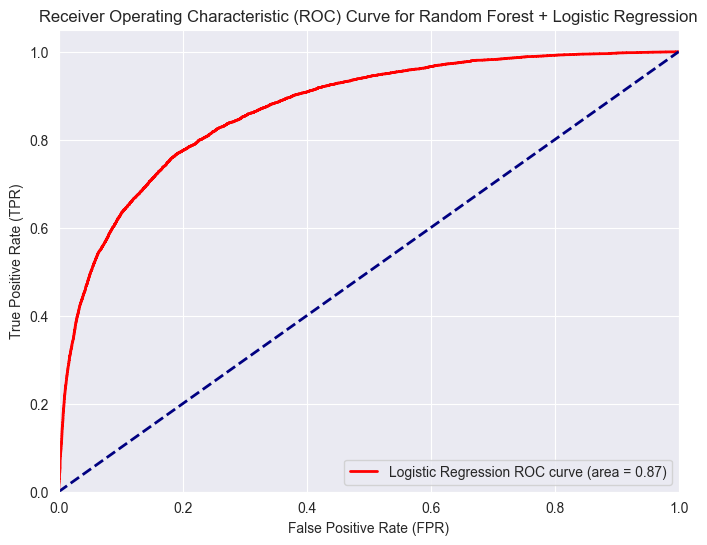

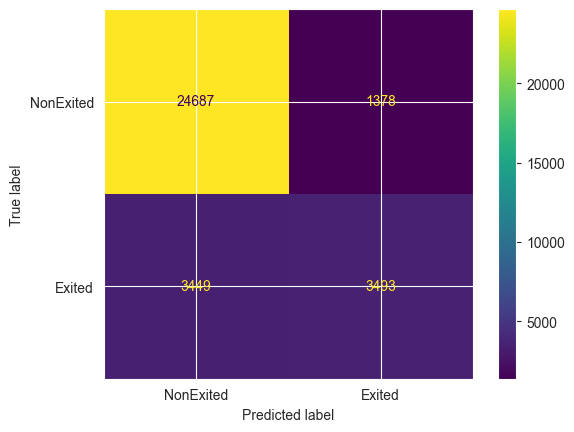

Random Forest with transformed data
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     26029
           1       0.73      0.48      0.58      6978

    accuracy                           0.85     33007
   macro avg       0.80      0.72      0.75     33007
weighted avg       0.84      0.85      0.84     33007



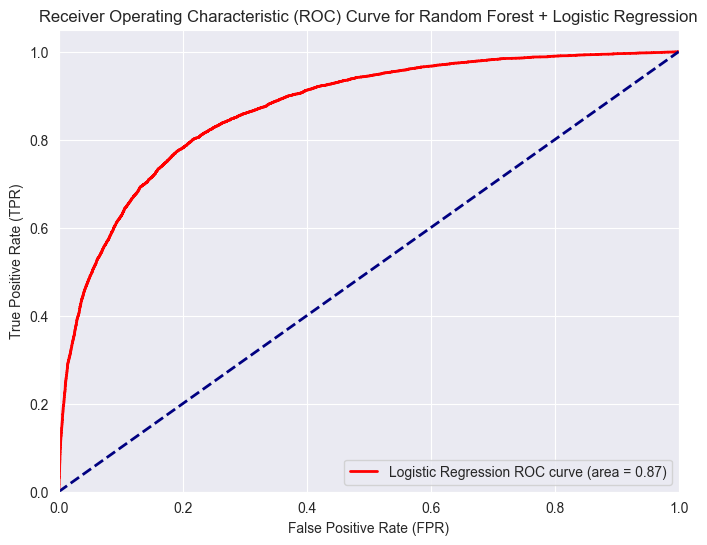

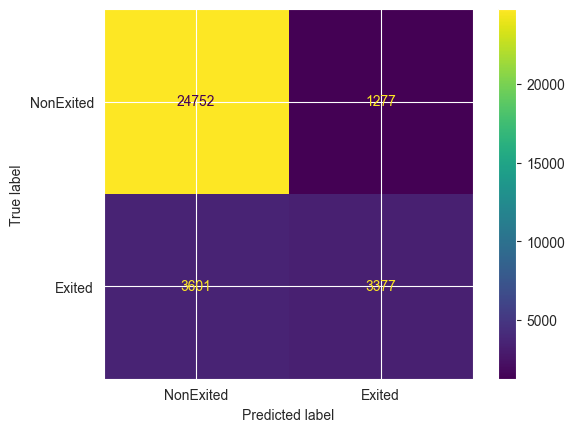

In [48]:
def random_forest_model(X_train, y_train, X_test, description, y_test):
    # Initialize Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Transform both train and test data using the fitted Random Forest model
    X_train_rf = rf.apply(X_train)
    X_test_rf = rf.apply(X_test)

    # Train Logistic Regression on transformed features
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train_rf, y_train)

    # Make predictions
    y_prob = model.predict_proba(X_test_rf)[:, 1]
    y_pred = (y_prob > 0.5).astype(int)

    # Skip evaluation if this is a test dataset
    
    print(description)
    print(classification_report(y_test, y_pred))

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc_logreg = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc_logreg:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest + Logistic Regression')
    plt.legend(loc="lower right")
    plt.show()
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['NonExited','Exited'])
    plt.show()
# Training and evaluating with initial data
random_forest_model(X_train, y_train, X_test, 'Random Forest with initial data', y_test=y_test)
y_pred_rf = random_forest_model(X_train1, y_train1, X_test1, 'Random Forest with transformed data', y_test=y_test1)

XGboost with initial data
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26065
           1       0.74      0.54      0.63      6942

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.77     33007
weighted avg       0.86      0.86      0.86     33007



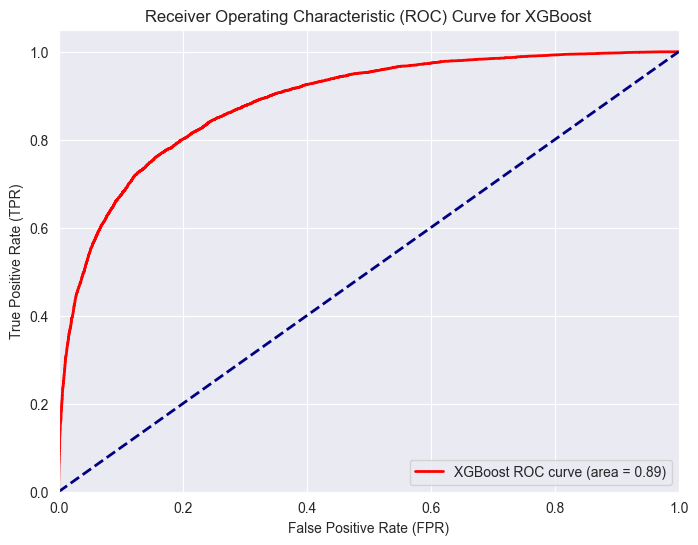

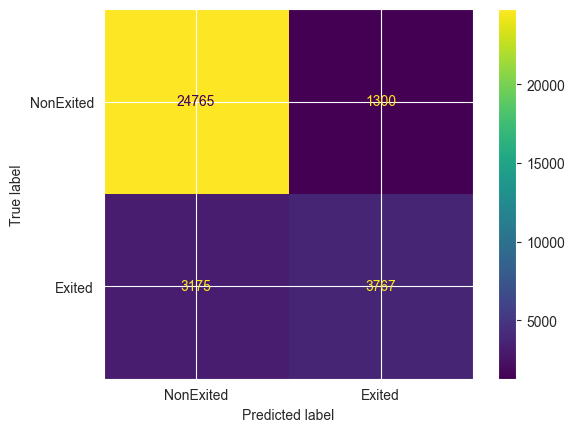

XGboost with transformed data
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     26065
           1       0.20      0.14      0.17      6942

    accuracy                           0.70     33007
   macro avg       0.50      0.50      0.49     33007
weighted avg       0.67      0.70      0.68     33007



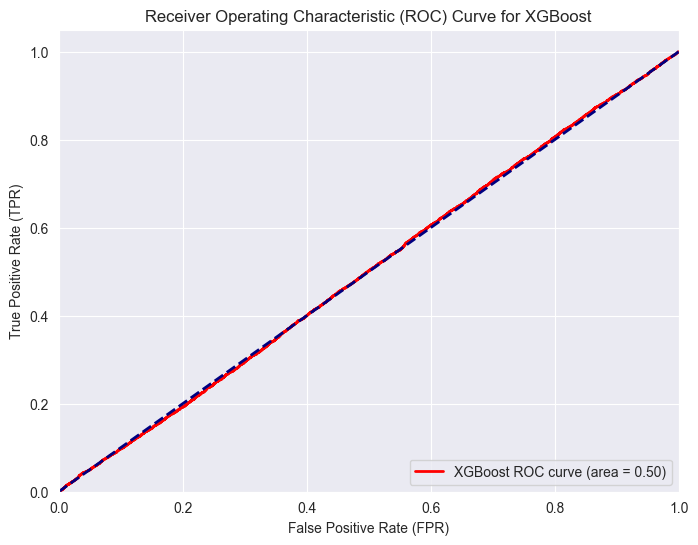

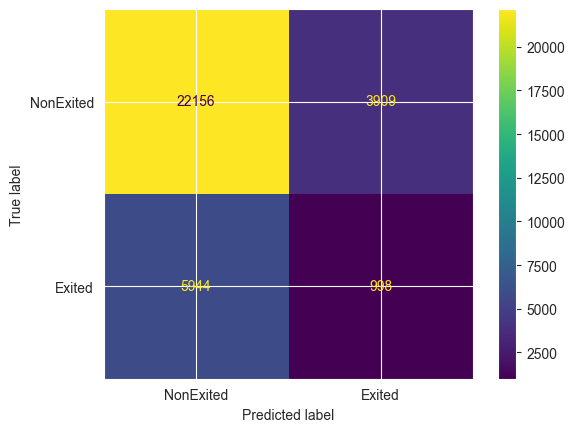

In [49]:
def xgboost_model(X_train, y_train, X_test, description):
#prepare the data
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    #set params
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'eta': 0.1,
        'max_depth': 3,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'seed': 42
    }
    num_rounds = 100

    #construct the model
    model = xgb.train(params, dtrain, num_rounds)
    y_prob = model.predict(dtest)

    #make prediction
    y_pred = (y_prob > 0.5).astype(int)

    #Evaluation
    print(description)
    print(classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_prob)

    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'XGBoost ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
    plt.legend(loc="lower right")
    plt.show()
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['NonExited','Exited'])
    plt.show()
xgboost_model(X_train, y_train, X_test,'XGboost with initial data')
xgboost_model(X_train1, y_train1, X_test1,'XGboost with transformed data')

Catboost with initial data
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26065
           1       0.74      0.54      0.63      6942

    accuracy                           0.86     33007
   macro avg       0.81      0.75      0.77     33007
weighted avg       0.86      0.86      0.86     33007



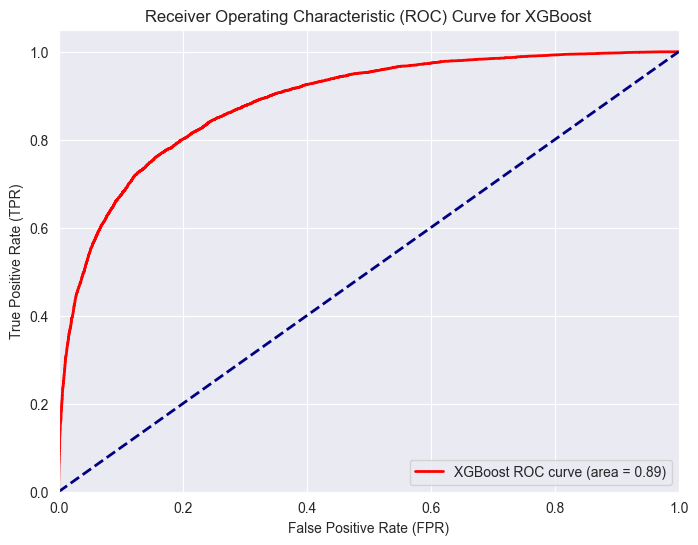

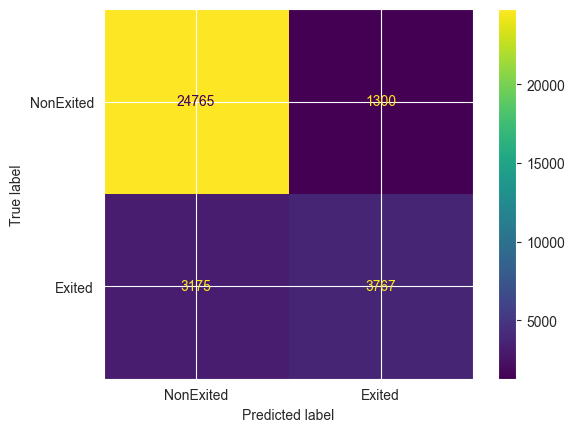

Catboost with transformed data
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     26065
           1       0.20      0.14      0.17      6942

    accuracy                           0.70     33007
   macro avg       0.50      0.50      0.49     33007
weighted avg       0.67      0.70      0.68     33007



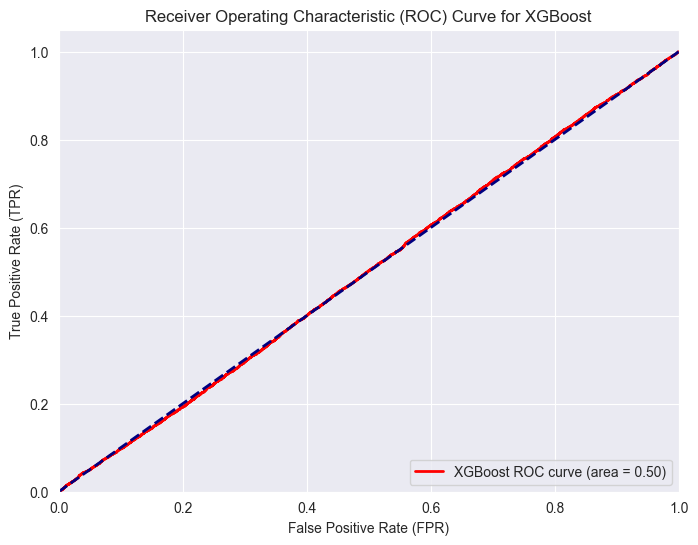

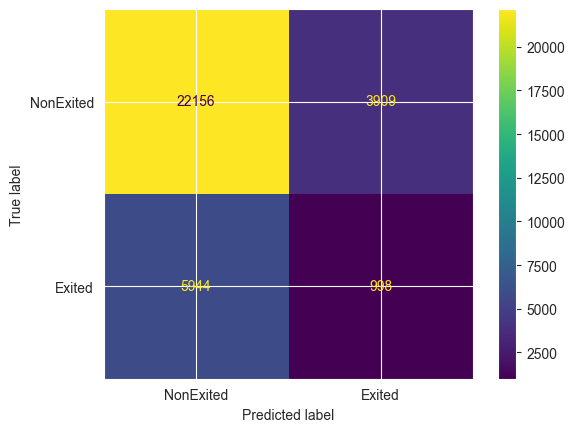

In [50]:
def catboost_model(X_train, y_train, X_test, description):
    model = CatBoostClassifier(
    iterations=100,  # 训练轮数
    learning_rate=0.1,  # 学习率
    depth=6,  # 树的深度
    verbose=20  # 每 20 轮输出一次日志
)

# 训练模型
    model.fit(X_train, y_train)


    #make prediction
    y_pred = model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred > 0.5).astype(int)

    #Evaluation
    print(description)
    print(classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_pred)

    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'XGBoost ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
    plt.legend(loc="lower right")
    plt.show()
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['NonExited','Exited'])
    plt.show()
xgboost_model(X_train, y_train, X_test,'Catboost with initial data')
xgboost_model(X_train1, y_train1, X_test1,'Catboost with transformed data')